<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week9/Regression%20Model%3A%20SVM%20Regression/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071
#### CreditDataset


In [ ]:
# Instalasi dan import library yang dibutuhkan
# Scikit-learn digunakan untuk membangun model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, classification_report

* NumPy (np): Digunakan untuk operasi numerik.
* Pandas (pd): Untuk membaca dan memproses dataset.
* Matplotlib (plt): Untuk membuat visualisasi data jika diperlukan.
* Scikit-learn Modules:
  1. train_test_split: Memisahkan data menjadi set latih dan set uji.
  2. StandardScaler: Normalisasi data agar berada dalam skala yang sama.
  3. SVR: Untuk membangun model Support Vector Regression.
  4. metrics: Untuk mengevaluasi performa model (MSE, MAE, R², dll.).

In [ ]:
# Membaca dataset dan melihat data
df = pd.read_csv("/content/sample_data/CreditDataset.csv")
print("Preview dataset:\n", df.head())

Preview dataset:
     x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


* pd.read_csv(): Membaca file dataset dalam format CSV.
* df.head(): Menampilkan 5 baris pertama untuk memahami struktur data.

In [ ]:
# Mengecek informasi dataset
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164

* df.info(): Menampilkan tipe data, jumlah nilai non-null, dan total kolom.

In [4]:
# Cek nama kolom
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'Class'],
      dtype='object')


* df.columns: Memeriksa nama semua kolom dataset.

In [5]:
# Pisahkan fitur (X) dan target (y)
# Sesuaikan kolom target dengan nama kolom yang relevan
X = df.drop(columns=['x5'])
y = df['x5']

* X: Semua kolom kecuali target (x5), berisi fitur-fitur yang akan digunakan untuk prediksi.
* y: Kolom target (x5) yang ingin diprediksi oleh model.

In [8]:
# Identifikasi kolom non-numerik
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Kolom non-numerik yang ditemukan:", non_numeric_columns)

Kolom non-numerik yang ditemukan: Index(['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17',
       'x19', 'x20'],
      dtype='object')


* select_dtypes(include=['object']): Memilih kolom dengan tipe data non-numerik (string atau kategori).
* Non-numerik perlu diubah ke bentuk numerik sebelum bisa digunakan dalam model regresi.

In [9]:
# Encoding data non-numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

* pd.get_dummies(): Mengubah data kategorikal menjadi numerik menggunakan one-hot encoding.
* drop_first=True: Menghapus satu kategori dummy untuk mencegah multikolinearitas.

In [10]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* train_test_split: Membagi data menjadi set latih (80%) dan set uji (20%).
* random_state=42: Memberikan seed untuk memastikan hasil yang konsisten setiap kali dijalankan.

In [11]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* StandardScaler: Menskalakan data sehingga distribusi setiap fitur memiliki mean = 0 dan standar deviasi = 1.
  - Penting untuk algoritma berbasis jarak seperti SVR, agar setiap fitur memiliki bobot yang setara.
* fit_transform: Menyesuaikan scaler dengan data latih dan menerapkannya pada data latih.
* transform: Menerapkan skala yang sama pada data uji.


In [12]:
# Membuat dan melatih model SVR
model = SVR(kernel='rbf')  # Kernel 'rbf' sering digunakan karena performa yang baik
model.fit(X_train, y_train)

SVR()

* SVR(kernel='rbf'): Membuat model Support Vector Regression dengan kernel Radial Basis Function (RBF).
  - Kernel RBF bekerja baik pada data non-linear.
* fit(X_train, y_train): Melatih model menggunakan data latih.

In [13]:
# Membuat prediksi
y_pred = model.predict(X_test)

* model.predict(X_test): Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji (X_test).
* y_pred: Array hasil prediksi nilai target.

In [14]:
# Evaluasi performa model regresi
print("\nEvaluasi Regresi:")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared: {r2}")


Evaluasi Regresi:
Mean Squared Error (MSE): 6396613.078543362
Root Mean Squared Error (RMSE): 2529.1526404199813
Mean Absolute Error (MAE): 1635.7107966555477
R-Squared: -0.051383129471456845


* mean_squared_error (MSE):
  - Mengukur rata-rata kuadrat selisih antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred).
  - Nilai lebih kecil berarti performa model lebih baik.
* rmse (Root Mean Squared Error):
  - Akar kuadrat dari MSE, menunjukkan error dalam unit yang sama dengan target.
* mean_absolute_error (MAE):
  - Mengukur rata-rata error absolut antara nilai sebenarnya dan prediksi.
  - Memberikan interpretasi langsung tentang besar kesalahan.
* r2_score (R²):
  - Mengukur seberapa baik model menjelaskan variabilitas dalam data.
  - Nilai R² mendekati 1 menunjukkan performa model yang baik.

In [16]:
# Konversi regresi menjadi kategori (biner)
# Thresholding digunakan untuk menghasilkan klasifikasi
y_test_class = (y_test > y_test.mean()).astype(int)
y_pred_class = (y_pred > y_test.mean()).astype(int)

* Mengubah hasil prediksi regresi (y_pred) menjadi klasifikasi biner berdasarkan threshold (nilai rata-rata y_test).

In [17]:
# Evaluasi performa klasifikasi
print("\nEvaluasi Klasifikasi:")
print(classification_report(y_test_class, y_pred_class))


Evaluasi Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       130
           1       0.00      0.00      0.00        70

    accuracy                           0.65       200
   macro avg       0.33      0.50      0.39       200
weighted avg       0.42      0.65      0.51       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* classification_report:
  - Precision: Proporsi prediksi positif yang benar.
  - Recall: Proporsi nilai positif yang berhasil diprediksi.
  - F1-Score: Harmonik rata-rata dari Precision dan Recall.
  - Accuracy: Proporsi prediksi yang benar terhadap total data.
* Laporan ini memberikan informasi penting tentang keseimbangan performa model pada kelas biner.

In [18]:
# Hitung ROC dan AUC
fpr, tpr, _ = roc_curve(y_test_class, y_pred)
auc = roc_auc_score(y_test_class, y_pred)
print(f"Area Under Curve (AUC): {auc}")

Area Under Curve (AUC): 0.7958241758241759


* roc_curve:
  - False Positive Rate (FPR): Proporsi negatif yang salah diklasifikasikan sebagai positif.
  - True Positive Rate (TPR): Proporsi positif yang diklasifikasikan dengan benar.
* roc_auc_score:
  - Menghitung Area Under Curve (AUC) dari ROC Curve.
  - AUC adalah ukuran keseluruhan kinerja klasifikasi.


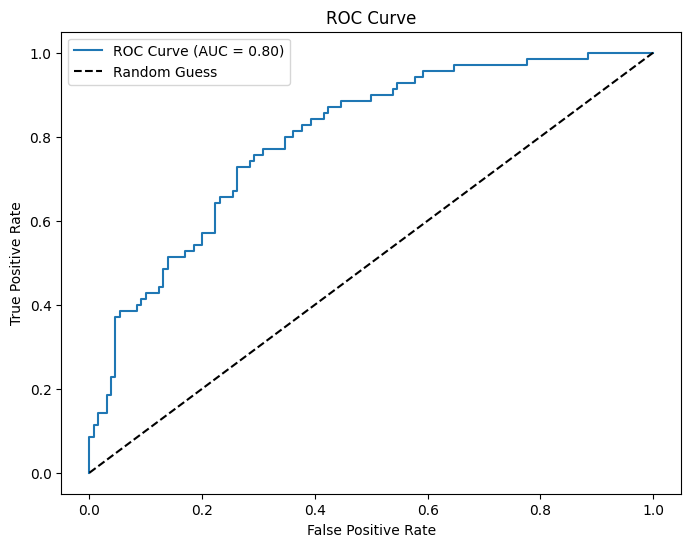

In [19]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

* ROC Curve (Receiver Operating Characteristic Curve), yang menunjukkan kinerja model klasifikasi biner berdasarkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai threshold.